# PROG8245_Lab4 - Tidying, Cleaning, Imputation, and Outlier Detection

## **Data Tidying** **PEW Research Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

1. Importing the dataset into a pandas dataframe.

In [4]:
# load the dataset
df_pew = pd.read_csv("./data/pew-raw.csv")

df_pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [5]:
#using tail() to view the last 5 rows
df_pew.tail()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [6]:
df_pew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   religion  10 non-null     object
 1    <$10k    10 non-null     int64 
 2    $10-20k  10 non-null     int64 
 3   $20-30k   10 non-null     int64 
 4   $30-40k   10 non-null     int64 
 5    $40-50k  10 non-null     int64 
 6   $50-75k   10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 692.0+ bytes


***What does not seem right in the above dataframe?***

The data type of `religion` column is object. We can reduce the number od features by transpose the data.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [7]:
new_df = pd.melt(df_pew,["religion"], var_name="income", value_name="observations")
#Sorted by first column
new_df = new_df.sort_values(by=["religion"])
# Showing first values
new_df.head()

,religion,income,observations
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34


This code cleans the income column by removing dollar signs and 'k' characters, and standardizes values like <10 to 0-10 for consistent formatting and easier numerical analysis.

In [8]:
new_df["income"] = new_df["income"].str.replace("$", "", regex=False)
new_df["income"] = new_df["income"].str.replace("k", "", regex=False)
new_df["income"] = new_df["income"].str.replace("<10", "0-10", regex=False)

new_df.head(10)


,religion,income,observations
0,Agnostic,0-10,27
30,Agnostic,30-40,81
40,Agnostic,40-50,76
50,Agnostic,50-75,137
10,Agnostic,10-20,34
20,Agnostic,20-30,60
41,Atheist,40-50,35
21,Atheist,20-30,37
11,Atheist,10-20,27
31,Atheist,30-40,52


## **Billboard Dataset**

`Continues with data tidying`

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [10]:
df_billboard = pd.read_csv("./data/billboard.csv", encoding="unicode_escape")

2. Observe the first few rows of the dataset.

In [11]:
df_billboard.head(7)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(f"number of rows before melt: {len(df_billboard)}")

number of rows before melt: 317


***What is wrong with the above dataset?***

- The week columns could be grouped into a single column for simplicity. 

- There are many NaNs values, where the track did not reach a ranking position during specific weeks.

- We can standardize the new created column to  improve clarity and structure.

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [13]:
# Reducing columns by melting the week features

df_billboard_melt = pd.melt(frame=df_billboard,
                            id_vars=["year","artist.inverted","track","time","genre","date.entered","date.peaked"],
                            var_name="week", value_name="ranking_week")

In [14]:
print(f"number of rows before melt: {len(df_billboard_melt)}")

number of rows before melt: 24092


In [15]:
df_billboard_melt.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [16]:
# Formatting 
df_billboard_melt["week"] = df_billboard_melt['week'].str.extract(r'(\d+)', expand=False).astype(int)

5. Now let's inspect the ***Week*** column in the dataframe.

In [17]:
df_billboard_melt["week"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76])

In [18]:
df_billboard_melt[df_billboard_melt['track'] == 'Independent Women Part I']

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
317,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,2,63.0
634,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,3,49.0
951,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,4,33.0
1268,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,5,23.0
...,...,...,...,...,...,...,...,...,...
22507,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,72,NaN
22824,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,73,NaN
23141,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,74,NaN
23458,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,75,NaN


Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



To find the date, we need to add the number of weeks to the date when the track entered the ranking:


`date = date.entered + week - 1` (so that the first week corresponds to the entry date)

*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

 It tries to add an integer to a datetime without converting it to a timedelta, which causes a type error or incorrect result.

 We need to use pd.to_timedelta() function


In [19]:
df_billboard_melt['date'] = pd.to_datetime(df_billboard_melt['date.entered']) + pd.to_timedelta(df_billboard_melt['week'] - 1, unit='W')

In [20]:
df_billboard_melt[df_billboard_melt['track'] == 'Independent Women Part I']

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking_week,date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-23
317,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,2,63.0,2000-09-30
634,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,3,49.0,2000-10-07
951,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,4,33.0,2000-10-14
1268,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,5,23.0,2000-10-21
...,...,...,...,...,...,...,...,...,...,...
22507,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,72,NaN,2002-02-02
22824,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,73,NaN,2002-02-09
23141,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,74,NaN,2002-02-16
23458,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,75,NaN,2002-02-23


7. Let's only keep necessary columns

In [21]:
billboard = df_billboard_melt[["year", "artist.inverted", "track", "genre", "ranking_week", "date"]]
billboard.head()

,year,artist.inverted,track,genre,ranking_week,date
0,2000,Destiny's Child,Independent Women Part I,Rock,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",Rock,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,Rock,71.0,1999-10-23
3,2000,Madonna,Music,Rock,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,57.0,2000-08-05


8. How to rename your columns?

In [22]:
# Rename with a dictionary
billboard.rename(
    columns={
    'artist.inverted': 'artist_inverted',
    'date': 'date_ranking'
        },
    inplace=True)

C:\Users\paula\AppData\Local\Temp\ipykernel_42516\3378658587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard.rename(


Display the dataframe

In [23]:
billboard.head()

,year,artist_inverted,track,genre,ranking_week,date_ranking
0,2000,Destiny's Child,Independent Women Part I,Rock,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",Rock,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,Rock,71.0,1999-10-23
3,2000,Madonna,Music,Rock,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,57.0,2000-08-05


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

`Analyzing the NaN values per column`

Using the **isna()** function, I will detect how many missing values we have in each column.


In [24]:
billboard.isna().sum()

year                   0
artist_inverted        0
track                  0
genre                  0
ranking_week       18785
date_ranking           0
dtype: int64

Some weeks do not contain information because the track did not have a ranking during those specific weeks. We can remove those rows.

In [25]:
print(f"Rows before cleaning: {len(billboard)}")

Rows before cleaning: 24092


In [26]:
# Deleting ranking_week NaN values
billboard_final_df = billboard.dropna()

In [27]:
print(f"Rows before cleaning: {len(billboard_final_df)}")

Rows before cleaning: 5307


## **Data Cleaning (Cars Dataset)**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








Start by reading the dataset related to car models: ./CSVs/cars.csv

In [29]:
# load the dataset
df_cars = pd.read_csv("./data/cars.csv", delimiter=';')

df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US


First Row seems to be the datatype, we need to remove it

In [30]:
# Removing first row
df_cars = df_cars.iloc[1:]


#### Exploratory Data Analysis

Using the info method prints to get summary of the data in the data frame

In [31]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 1 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           406 non-null    object
 1   MPG           403 non-null    object
 2   Cylinders     406 non-null    object
 3   Displacement  405 non-null    object
 4   Horsepower    404 non-null    object
 5   Weight        405 non-null    object
 6   Acceleration  406 non-null    object
 7   Model         406 non-null    object
 8   Origin        406 non-null    object
dtypes: object(9)
memory usage: 28.7+ KB


Getting the number of instances and features

In [32]:
# Getting the number of instances and features

df_cars.shape

(406, 9)

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [33]:
# Finding the null values
df_cars.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [34]:
total_missing = np.sum(pd.isna(df_cars))
total_cells = df_cars.size


missing_percent = (total_missing / total_cells) * 100
missing_percent


c:\Users\paula\github-classroom\PROG8245 - ML Programming\PROG8245-PR-Lab4\venv-PR-Lab4\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Car             0.000000
MPG             0.082102
Cylinders       0.000000
Displacement    0.027367
Horsepower      0.054735
Weight          0.027367
Acceleration    0.000000
Model           0.000000
Origin          0.000000
dtype: float64

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [35]:
missing_percent_total = np.round(np.sum(missing_percent),2)
print(missing_percent_total)

0.19


Lets also check dropping the columns

In [36]:
# Printing size
print(f"Number of rows before deleting: {df_cars.size}")

Number of rows before deleting: 3654


In [37]:
df_cars_columns_dropped = df_cars.drop(columns=['MPG','Weight','Horsepower','Displacement'])


Let's observe how many columns we lost

In [38]:
# Printing the number of rows
print(f"Number of rows after deleting: {df_cars_columns_dropped.size}")
print(f"number of columns lost")

Number of rows after deleting: 2030
number of columns lost


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [39]:
df_filling_0 = df_cars.fillna(0)
df_filling_0.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,0,3693.,11.5,70,US
3,Plymouth Satellite,0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,0,150.0,0,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

In [40]:
df_cars['MPG'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 406 entries, 1 to 406
Series name: MPG
Non-Null Count  Dtype 
--------------  ----- 
403 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


When attempting to plot the distribution of the `MPG` column, the x-axis appeared unreadable. This, because the not of numeric type caused that `seaborn.histplot()` to treat each unique value as a separate category. I decided to convert the column to numeric using `pd.to_numeric()`

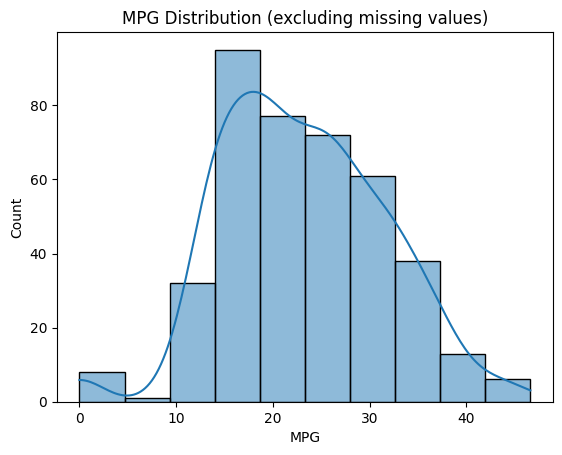

In [41]:
df_cars['MPG'] = pd.to_numeric(df_cars['MPG'], errors='coerce')

sns.histplot(df_cars['MPG'].dropna(), kde=True, bins=10)
plt.title("MPG Distribution (excluding missing values)")
plt.show()

### **Manual Imputation**

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [42]:
# Converting all object columns to numeric
int_vars = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']
for col in int_vars:
    df_cars[col] = pd.to_numeric(df_cars[col], errors='coerce')

# Checking the data types after conversion
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 1 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           403 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  405 non-null    float64
 4   Horsepower    404 non-null    float64
 5   Weight        405 non-null    float64
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.7+ KB


Now let's see what is the mean of the MPG column

In [43]:
# Calculate mean of all the values of the column
mean_MPG = df_cars['MPG'].mean()
print(f"The mean of the MPG column is: {round(mean_MPG,2)}")

The mean of the MPG column is: 23.1


In [44]:
#Before filling the NaN values
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.0,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.0,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.0,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [45]:
# Using Manual Imputation (ML)
df_cars['MPG_ML'] = df_cars['MPG'].fillna(round(mean_MPG,2))
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,MPG_ML
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.0,12.0,70,US,23.1
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.0,11.5,70,US,15.0
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.0,11.0,70,US,23.1
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US,16.0
5,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.0


### **Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [46]:
from sklearn.impute import SimpleImputer

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [47]:
# Creating the imputer with the mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#Creating a list of columns to impute
imputation_vars = ['MPG', 'Displacement', 'Horsepower', 'Weight']

# 1. fit the data 
imputer.fit_transform(df_cars[imputation_vars])
# 2. Transform the data
df_cars[imputation_vars] = imputer.transform(df_cars[imputation_vars]).round(1)

# Checking the data types after imputation
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,MPG_ML
1,Chevrolet Chevelle Malibu,23.1,8,307.0,130.0,3504.0,12.0,70,US,23.1
2,Buick Skylark 320,15.0,8,350.0,103.1,3693.0,11.5,70,US,15.0
3,Plymouth Satellite,23.1,8,318.0,150.0,3436.0,11.0,70,US,23.1
4,AMC Rebel SST,16.0,8,194.5,150.0,2978.3,12.0,70,US,16.0
5,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,17.0


## **Outlier Detection (Diabetes Dataset)** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [48]:
# Importing
from sklearn.datasets import load_diabetes

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Outliers Visualization

### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

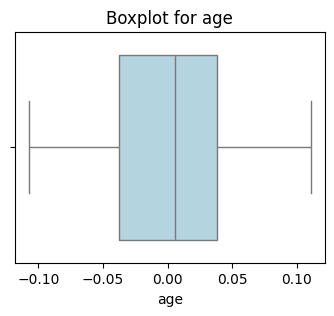

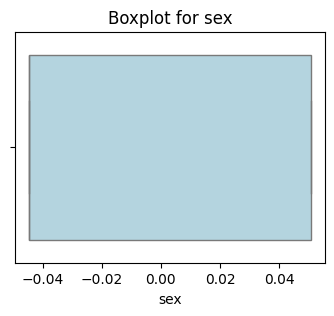

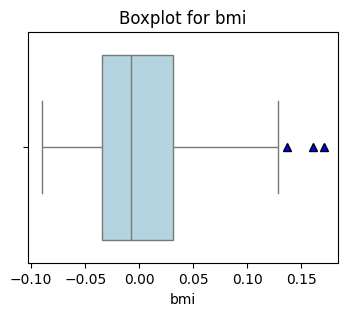

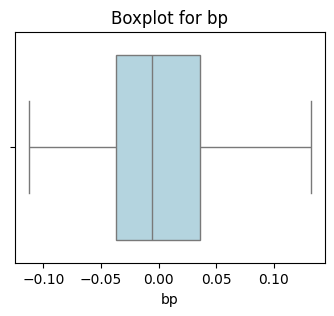

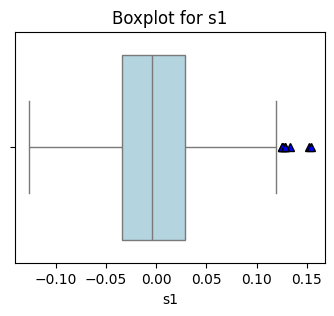

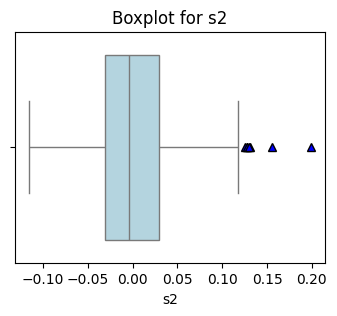

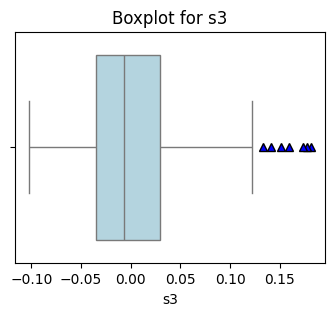

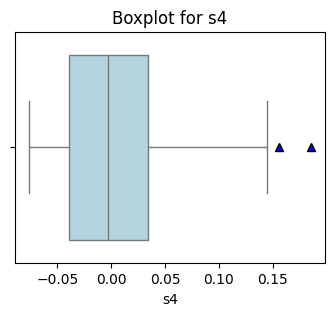

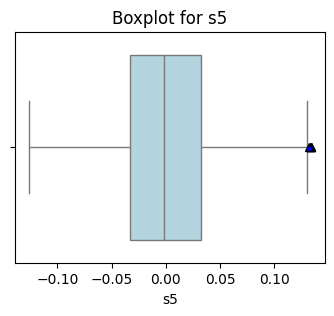

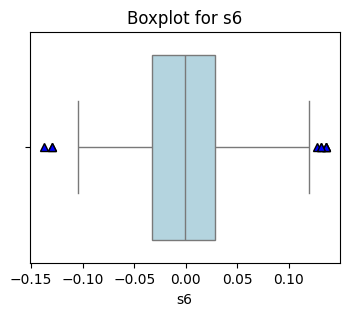

In [49]:
# Creating a boxplot for all columns in the dataframe

for col in df_diabetics.columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df_diabetics[col],
                color="lightblue",
                flierprops={
                        'marker': '^',           
                        'markerfacecolor': 'blue',
                        'markersize': 6,
                        'linestyle': 'none',
                        'markeredgecolor': 'black'
                    })
    plt.title(f'Boxplot for {col}')  
    plt.show()



#### Observations

The boxplots show several outliers in variables such as `bmi`, `s3`, `s4`, `s5`, and `s6`. These values fall outside the whiskers and can significantly affect model performance if not handled properly. 


### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

### Scatter Plot: Blood Sugar vs LDL

To visualize outliers and the relationship between blood sugar levels (`s5`) and LDL cholesterol (`s2`) I used scatter plot. It also allows us to identify potential outliers.


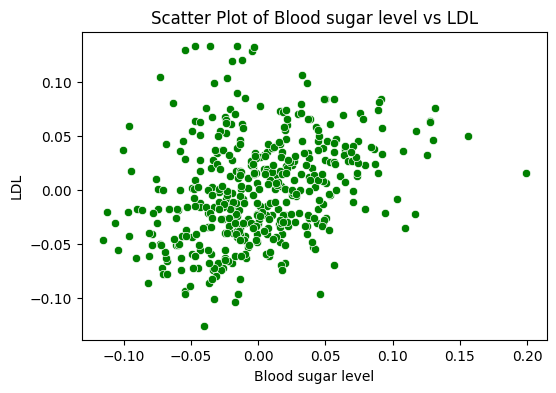

In [50]:
plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df_diabetics, x='s2', y='s5',
                color='green',)
plt.title('Scatter Plot of Blood sugar level vs LDL')
#setting the x and y labels
plt.xlabel('Blood sugar level')
plt.ylabel('LDL')
plt.show()

### Z-Score:

Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [51]:
from scipy import stats

z = np.abs(stats.zscore(df_diabetics['age']))
# Assigning the z-score df
df_diabetics['zs_age'] = z.round(2)

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [52]:
threshold = 2

outlier_indices = np.where(z > threshold)[0]
#printing the rows with outliers
df_diabetics_outliers = df_diabetics.iloc[outlier_indices]
df_diabetics_outliers

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,zs_age
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215,2.03
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220,2.25
41,-0.099961,-0.044642,-0.067641,-0.108956,-0.074494,-0.072712,0.015505,-0.039493,-0.049872,-0.009362,2.10
77,-0.096328,-0.044642,-0.036385,-0.074527,-0.038720,-0.027618,0.015505,-0.039493,-0.074093,-0.001078,2.03
79,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.019980,0.011824,-0.002592,-0.068332,-0.025930,2.18
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920,2.03
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046883,-0.079778,2.03
204,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002004,0.077622,2.33
223,-0.099961,-0.044642,-0.023451,-0.064199,-0.057983,-0.060186,0.011824,-0.039493,-0.018114,-0.050783,2.10
226,-0.103593,0.050680,-0.046085,-0.026328,-0.024960,-0.024800,0.030232,-0.039493,-0.039809,-0.054925,2.18


### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [53]:
# Interquartile Range (IQR) for the 'bmi' column
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(f'Q1 for bmi: {Q1.round(2)}')
print(f'Q3 for bmi: {Q3.round(2)}')
print(f'IQR for bmi: {IQR.round(2)}')


Q1 for bmi: -0.03
Q3 for bmi: 0.03
IQR for bmi: 0.07


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [54]:
# Above Upper bound
upper = Q3+1.5*IQR

# Below Lower bound
lower = Q1-1.5*IQR

print(f"The boundaries for outlier detection in 'bmi' are  Lower bound: {lower.round(2)} and Upper bound: {upper.round(2)}")


The boundaries for outlier detection in 'bmi' are  Lower bound: -0.13 and Upper bound: 0.13


### Creating a plot to better understanding

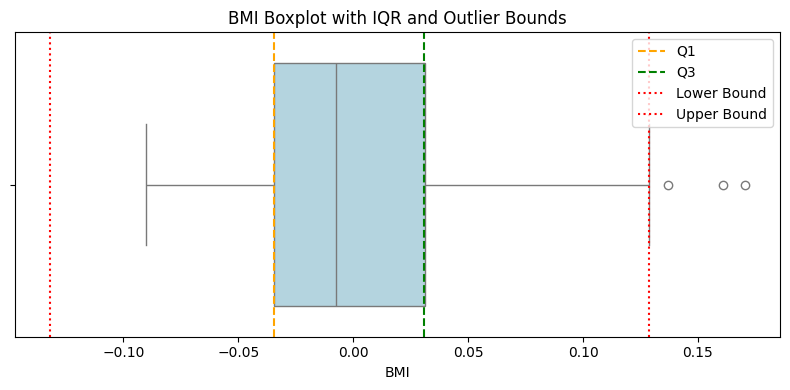

In [55]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_diabetics['bmi'], color='lightblue')


plt.axvline(Q1, color='orange', linestyle='--', label='Q1')
plt.axvline(Q3, color='green', linestyle='--', label='Q3')
plt.axvline(lower, color='red', linestyle=':', label='Lower Bound')
plt.axvline(upper, color='red', linestyle=':', label='Upper Bound')

plt.title('BMI Boxplot with IQR and Outlier Bounds')
plt.xlabel('BMI')
plt.legend()
plt.tight_layout()
plt.show()


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [56]:
print("Old Shape: ", df_diabetics.shape)

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetics['bmi'] >= upper)[0]
lower_array = np.where(df_diabetics['bmi'] <= lower)[0]

# Removing the outliers
df_diabetics.drop(index=upper_array, inplace=True)
df_diabetics.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetics.shape)

Old Shape:  (442, 11)
New Shape:  (439, 11)


### Outlier Removal

After removal outliers with this approach (IQR), the dataset change from 442 to 439, This indicates that 13 rows were removed.

Removing them can help improve the analyses. 

**In the next plot we can see the result of this deletion.**


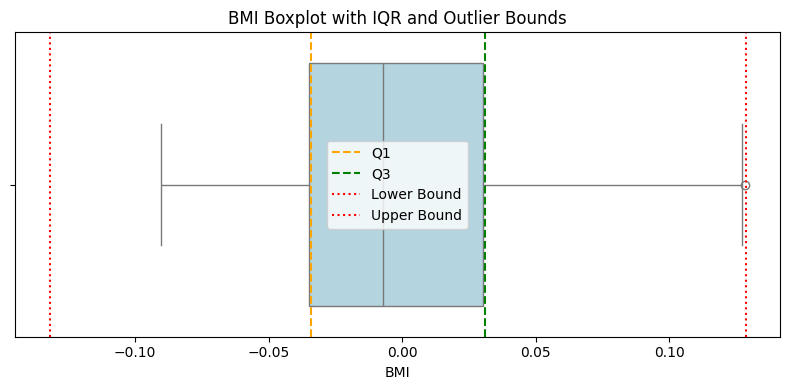

In [57]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_diabetics['bmi'], color='lightblue')


plt.axvline(Q1, color='orange', linestyle='--', label='Q1')
plt.axvline(Q3, color='green', linestyle='--', label='Q3')
plt.axvline(lower, color='red', linestyle=':', label='Lower Bound')
plt.axvline(upper, color='red', linestyle=':', label='Upper Bound')

plt.title('BMI Boxplot with IQR and Outlier Bounds')
plt.xlabel('BMI')
plt.legend()
plt.tight_layout()
plt.show()


Visualization tools such as box plots and scatter plots are very useful for identifying outliers. The mathematical methods like Z-scores and Inter Quartile Range (IQR) give us complementary approaches. Depending on the nature of our data and the analysis goals, we can use the most appropriate.

## **Replicability Check**

To verify the replicability of the notebook, I tested the complete workflow on a different machine using one of Conestoga’s Remote Desktop (RDP) environments accessed via VPN.

I set up the environment using the provided `requirements.txt` file and followed the installation and activation steps from scratch. 

While testing the notebook on a clean environment, I initially encountered errors due to Python not being installed or not added to the system PATH. To avoid the same issue, I updated the `README.md` file with clear instructions on how to install Python using PowerShell with `curl`. The guide also explains how to verify the installation and ensure Python is added to the system PATH.

These changes helps others reproducing the project.

After this, the notebook ran successfully from start to finish without errors, confirming that all dependencies were correctly listed and that the code is portable across systems.

No issues were encountered during this process.


![Replicability Check Evidence](img/Replicability_Evidence.png)